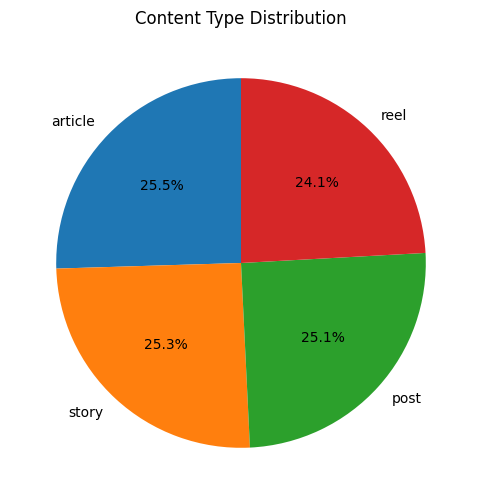

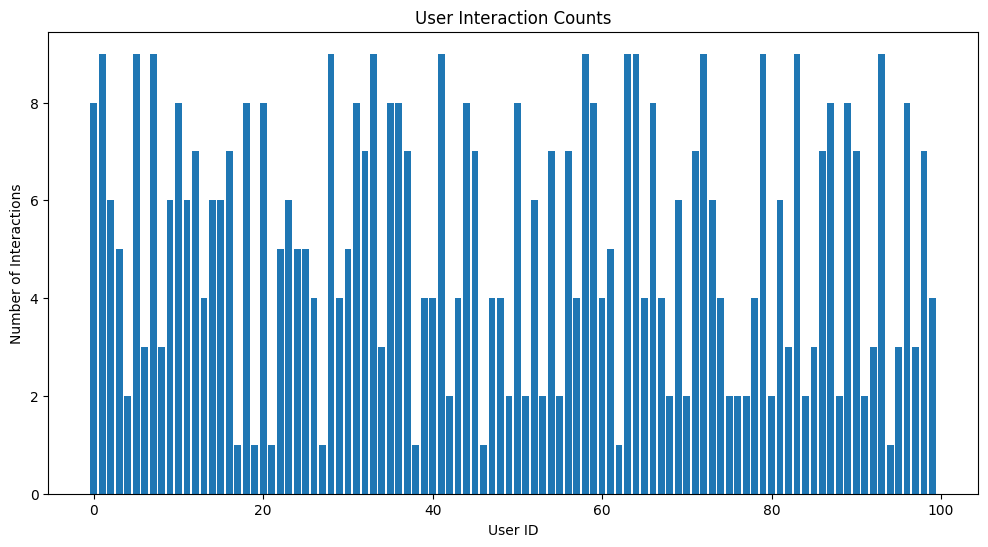

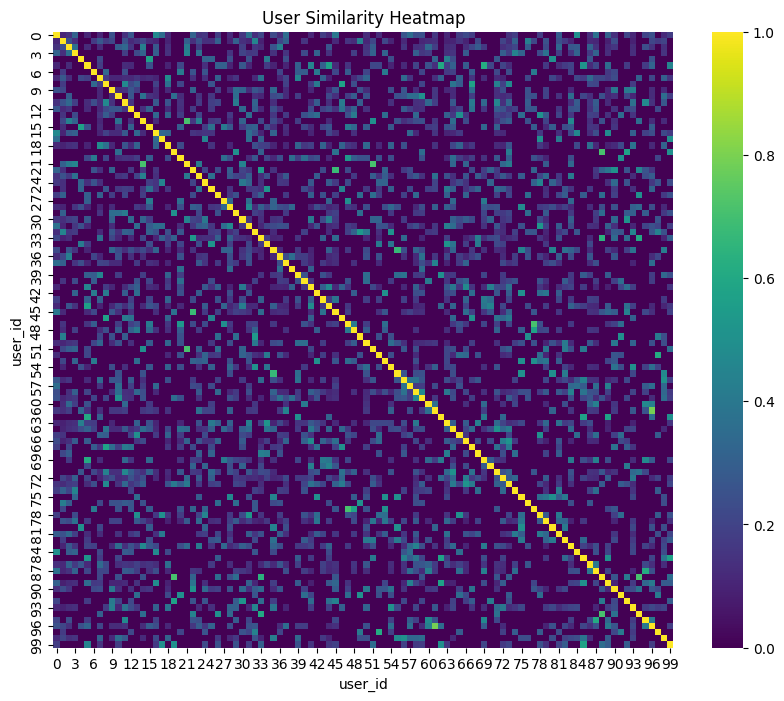

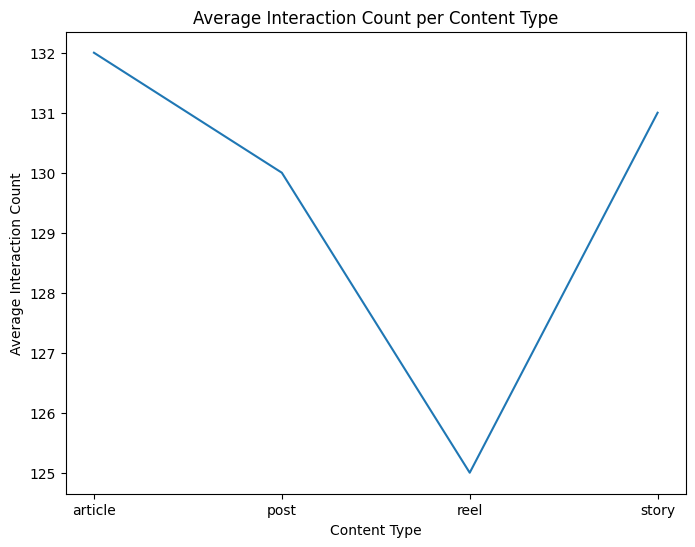

Recommended content for user 10: [48, 17, 25, 12, 29]


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Generate fake user data
num_users = 100
num_contents = 50

user_ids = np.arange(num_users)
content_ids = np.arange(num_contents)
content_types = ['reel', 'post', 'story', 'article']

user_content_interactions = []
for user_id in user_ids:
  num_interactions = np.random.randint(1, 10)
  for _ in range(num_interactions):
    content_id = np.random.choice(content_ids)
    content_type = np.random.choice(content_types)
    user_content_interactions.append([user_id, content_id, content_type])


df_interactions = pd.DataFrame(user_content_interactions, columns=['user_id', 'content_id', 'content_type'])

# Create user-content interaction matrix
user_content_matrix = df_interactions.groupby(['user_id', 'content_id'])['content_type'].count().unstack().fillna(0)


# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_content_matrix)
df_user_similarity = pd.DataFrame(user_similarity, index=user_content_matrix.index, columns=user_content_matrix.index)


# Visualizations
# 1. Content type distribution
content_type_counts = df_interactions['content_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Content Type Distribution')
plt.show()


# 2. Interaction count per user (Bar graph)
user_interaction_counts = df_interactions.groupby('user_id')['content_id'].count()
plt.figure(figsize=(12, 6))
plt.bar(user_interaction_counts.index, user_interaction_counts.values)
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.title('User Interaction Counts')
plt.show()


# 3. User similarity heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_user_similarity, cmap='viridis')
plt.title('User Similarity Heatmap')
plt.show()



# 4. Average interaction count per content type (Line Graph)
avg_interactions_per_content_type = df_interactions.groupby(['content_type'])['content_id'].count()
plt.figure(figsize=(8, 6))
plt.plot(avg_interactions_per_content_type.index, avg_interactions_per_content_type.values)
plt.xlabel('Content Type')
plt.ylabel('Average Interaction Count')
plt.title('Average Interaction Count per Content Type')
plt.show()

# Example recommendation: Find similar users and recommend content they interacted with
def recommend_content(user_id, df_user_similarity, df_interactions, top_n=5):
  similar_users = df_user_similarity[user_id].sort_values(ascending=False)[1:6].index.tolist()
  recommended_content_ids = []
  for similar_user in similar_users:
      content_ids_similar_user = df_interactions[df_interactions['user_id'] == similar_user]['content_id'].tolist()
      for content_id in content_ids_similar_user:
        if content_id not in df_interactions[df_interactions['user_id'] == user_id]['content_id'].tolist():
          recommended_content_ids.append(content_id)

  return recommended_content_ids[:top_n]

# Example: Recommend content for user 10
recommended_content = recommend_content(10, df_user_similarity, df_interactions)
print(f"Recommended content for user 10: {recommended_content}")
